# AIS

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

pd.set_option('display.max_columns', None)  # Set to display all columns

In [2]:
df_agroFood = pd.read_csv('Agrofood_co2_emission.csv', encoding='latin1')
df_co2Deforest = pd.read_csv('co2-deforestation-for-food.csv', encoding='latin1')
df_foodProduc = pd.read_csv('Food_Production.csv', encoding='latin1')
#df_foodEmissions = pd.read_csv('food-emissions-supply-chain.csv', encoding='latin1')
df_foodEmissions = pd.read_csv('Total Emissions Per Country (2000-2020).csv', encoding='latin1')
df_ghg = pd.read_csv('ghg-per-kg-poore.csv', encoding='latin1')
df_foodLoss = pd.read_csv('global-food-loss-index.csv', encoding='latin1')
df_globalFood = pd.read_csv('global-food.csv', encoding='latin1')
df_globalFood2 = pd.read_csv('global-food(1).csv', encoding='latin1')
df_waterWithdrawals = pd.read_csv('water-withdrawals-per-kg-poore.csv', encoding='latin1')
df_continents = pd.read_csv('continents2.csv', encoding='latin1')
df_fao = pd.read_csv('fao_global_food_waste_2000_2021.csv', encoding='latin1')

# 1) Dataset agroFood

In [3]:
df_agroFood.tail()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature Â°C
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.0,251.1465,76500.2982,10662.4408,251.2681,443.0872,428.4352,22.9108,1077.2392,317.0744,2585.080847,858.982,96.1332,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.0,255.7975,76500.2982,10662.4408,203.1236,445.3881,304.7852,18.9857,1093.3441,332.7759,1227.240253,889.425,81.2314,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.0,327.0897,76500.2982,10662.4408,211.1539,492.8599,346.8512,19.0570,1108.5523,348.5107,1127.687805,966.265,81.0712,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.0,290.1893,76500.2982,10662.4408,228.6381,542.5922,350.2168,17.9514,1121.3255,327.8209,2485.528399,945.942,85.7211,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667
6964,Zimbabwe,2020,481.9027,48.4197,108.3022,7.9733,0.0,73.0,238.7639,76500.2982,10662.4408,213.9211,568.0445,350.2168,16.6754,1134.1634,307.4145,1227.240253,940.420,85.3143,2829.7457,266.7316,0.0,0.0,444.2335,11980005.0,5700460.0,7385220.0,8284447.0,96505.221853,0.189000


In [4]:
df_agroFood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

<Axes: >

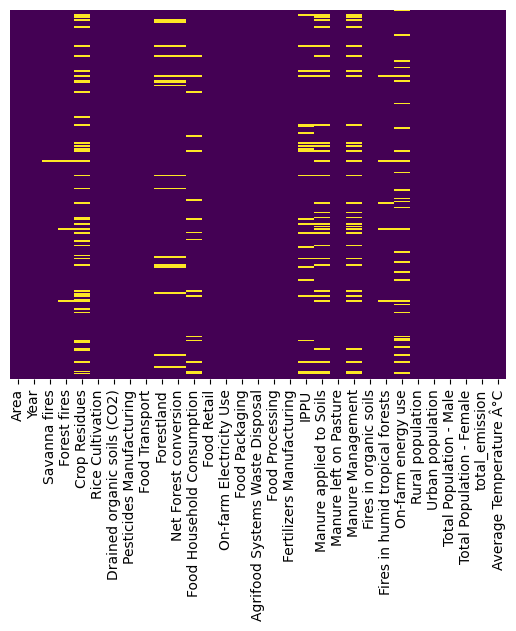

In [5]:
sns.heatmap(df_agroFood.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
# Remover dados de anos inferiores a 2010
df_agroFood = df_agroFood[df_agroFood['Year'] >= 2010]
df_agroFood

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature Â°C
20,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.610850,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,NaN,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.529250
21,Afghanistan,2011,1.8412,0.0000,335.0379,823.2000,0.0,81.610850,478.8137,-246.2191,0.0000,522.6275,270.6066,50.4527,339.833670,2610.1325,1299.824095,32.492700,192.3717,449.4714,2840.2660,843.1709,0.0,0.0,NaN,22594126.0,7114473.0,14780282.0,14468875.0,10925.534316,1.254583
22,Afghanistan,2012,2.8955,0.0000,445.5958,803.6000,0.0,107.386444,530.8213,-246.2191,0.0000,534.4065,271.2397,47.1675,339.833670,2743.2372,1326.917597,29.443300,266.4513,441.8546,2798.7363,836.9089,0.0,0.0,NaN,23280663.0,7416295.0,15399105.0,15067373.0,11280.276511,0.344167
23,Afghanistan,2013,3.1595,0.0000,455.0727,803.6000,0.0,76.061874,391.0777,-246.2191,0.0000,833.2319,276.2396,66.6996,353.930640,2870.4764,1441.160481,29.981400,333.5334,432.0026,2741.0994,832.8961,0.0,0.0,NaN,23997856.0,7733832.0,15946572.0,15594637.0,11694.004195,1.290917
24,Afghanistan,2014,2.6796,0.0000,473.4174,862.4000,0.0,49.782873,304.1804,-246.2191,0.0000,1094.1338,333.4255,78.6716,353.930640,2976.2524,1484.197070,28.639400,282.6155,437.6203,2770.4672,842.5037,0.0,0.0,NaN,24703798.0,8054222.0,16543889.0,16172321.0,12128.698284,0.468667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,10662.4408,251.2681,443.0872,428.4352,22.910800,1077.2392,317.074400,2585.080847,858.9820,96.1332,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,10662.4408,203.1236,445.3881,304.7852,18.985700,1093.3441,332.775900,1227.240253,889.4250,81.2314,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,10662.4408,211.1539,492.8599,346.8512,19.057000,1108.5523,348.510700,1127.687805,966.2650,81.0712,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,10662.4408,228.6381,542.5922,350.2168,17.951400,1121.3255,327.820900,2485.528399,945.9420,85.7211,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [7]:
df_agroFood = df_agroFood.rename(columns={'Area': 'Country', 'total_emission': 'Emissions_food'})
df_agroFood

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Emissions_food,Average Temperature Â°C
20,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.610850,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,NaN,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.529250
21,Afghanistan,2011,1.8412,0.0000,335.0379,823.2000,0.0,81.610850,478.8137,-246.2191,0.0000,522.6275,270.6066,50.4527,339.833670,2610.1325,1299.824095,32.492700,192.3717,449.4714,2840.2660,843.1709,0.0,0.0,NaN,22594126.0,7114473.0,14780282.0,14468875.0,10925.534316,1.254583
22,Afghanistan,2012,2.8955,0.0000,445.5958,803.6000,0.0,107.386444,530.8213,-246.2191,0.0000,534.4065,271.2397,47.1675,339.833670,2743.2372,1326.917597,29.443300,266.4513,441.8546,2798.7363,836.9089,0.0,0.0,NaN,23280663.0,7416295.0,15399105.0,15067373.0,11280.276511,0.344167
23,Afghanistan,2013,3.1595,0.0000,455.0727,803.6000,0.0,76.061874,391.0777,-246.2191,0.0000,833.2319,276.2396,66.6996,353.930640,2870.4764,1441.160481,29.981400,333.5334,432.0026,2741.0994,832.8961,0.0,0.0,NaN,23997856.0,7733832.0,15946572.0,15594637.0,11694.004195,1.290917
24,Afghanistan,2014,2.6796,0.0000,473.4174,862.4000,0.0,49.782873,304.1804,-246.2191,0.0000,1094.1338,333.4255,78.6716,353.930640,2976.2524,1484.197070,28.639400,282.6155,437.6203,2770.4672,842.5037,0.0,0.0,NaN,24703798.0,8054222.0,16543889.0,16172321.0,12128.698284,0.468667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,10662.4408,251.2681,443.0872,428.4352,22.910800,1077.2392,317.074400,2585.080847,858.9820,96.1332,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,10662.4408,203.1236,445.3881,304.7852,18.985700,1093.3441,332.775900,1227.240253,889.4250,81.2314,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,10662.4408,211.1539,492.8599,346.8512,19.057000,1108.5523,348.510700,1127.687805,966.2650,81.0712,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,10662.4408,228.6381,542.5922,350.2168,17.951400,1121.3255,327.820900,2485.528399,945.9420,85.7211,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


# Dataset co2Deforest (1 pequeno)

In [8]:
df_co2Deforest

,Entity,Code,Year,total_embodied_emissions
0,Australia,AUS,2013,1.219255e+07
1,Austria,AUT,2013,3.021984e+06
2,Belgium,BEL,2013,1.082760e+07
3,Brazil,BRA,2013,5.447281e+08
4,Bulgaria,BGR,2013,6.481203e+05
5,Canada,CAN,2013,1.282691e+07
6,China,CHN,2013,1.931663e+08
7,Croatia,HRV,2013,5.138495e+05
8,Cyprus,CYP,2013,2.646826e+05
9,Czechia,CZE,2013,2.079429e+06


In [9]:
df_co2Deforest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Entity                    44 non-null     object 
 1   Code                      44 non-null     object 
 2   Year                      44 non-null     int64  
 3   total_embodied_emissions  44 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.5+ KB


# dataset foodProduction (1 das comidas)

In [10]:
df_foodProduc.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPOâeq per 1000kcal),Eutrophying emissions per kilogram (gPOâeq per kilogram),Eutrophying emissions per 100g protein (gPOâeq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCOâeq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCOâeq per 100g protein),Land use per 1000kcal (mÂ² per 1000kcal),Land use per kilogram (mÂ² per kilogram),Land use per 100g protein (mÂ² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,11.23,8.638462,183.911552,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,35.07,49.394366,609.983722,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


In [11]:
df_foodProduc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

In [12]:
# make a rename
df_foodProduc = df_foodProduc.rename(columns={"Food product": "Food", "Total_emissions": "Total_Emissions_per_kilogram"})

### tipos de comidas

In [13]:
df_foodProduc["Food"].value_counts().sort_index()

Food
Apples                 1
Bananas                1
Barley (Beer)          1
Beef (beef herd)       1
Beef (dairy herd)      1
Beet Sugar             1
Berries & Grapes       1
Brassicas              1
Cane Sugar             1
Cassava                1
Cheese                 1
Citrus Fruit           1
Coffee                 1
Dark Chocolate         1
Eggs                   1
Fish (farmed)          1
Groundnuts             1
Lamb & Mutton          1
Maize (Meal)           1
Milk                   1
Nuts                   1
Oatmeal                1
Olive Oil              1
Onions & Leeks         1
Other Fruit            1
Other Pulses           1
Other Vegetables       1
Palm Oil               1
Peas                   1
Pig Meat               1
Potatoes               1
Poultry Meat           1
Rapeseed Oil           1
Rice                   1
Root Vegetables        1
Shrimps (farmed)       1
Soybean Oil            1
Soymilk                1
Sunflower Oil          1
Tofu                

In [14]:
# make a rename
df_co2Deforest = df_co2Deforest.rename(columns={"Entity": "Country", "total_embodied_emissions": "Total_emissions_co2"})
to_drop = ["Code"]
df_co2Deforest = df_co2Deforest.drop(to_drop, axis=1)

In [15]:
df_co2Deforest

,Country,Year,Total_emissions_co2
0,Australia,2013,1.219255e+07
1,Austria,2013,3.021984e+06
2,Belgium,2013,1.082760e+07
3,Brazil,2013,5.447281e+08
4,Bulgaria,2013,6.481203e+05
5,Canada,2013,1.282691e+07
6,China,2013,1.931663e+08
7,Croatia,2013,5.138495e+05
8,Cyprus,2013,2.646826e+05
9,Czechia,2013,2.079429e+06


In [16]:
df_co2Deforest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              44 non-null     object 
 1   Year                 44 non-null     int64  
 2   Total_emissions_co2  44 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


# dataset foodEmissions (2 das comidas)

In [17]:
df_foodEmissions

,ï»¿Area,Item,Element,Unit,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,Crop Residues,Direct emissions (N2O),kilotonnes,5.200000e-01,5.267000e-01,8.200000e-01,9.988000e-01,8.225000e-01,1.182100e+00,1.027700e+00,1.242600e+00,8.869000e-01,1.392000e+00,1.274200e+00,1.032100e+00,1.372600e+00,1.401800e+00,1.458400e+00,1.242400e+00,1.194000e+00,1.061700e+00,8.988000e-01,1.217600e+00,1.317000e+00
1,Afghanistan,Crop Residues,Indirect emissions (N2O),kilotonnes,1.170000e-01,1.185000e-01,1.845000e-01,2.247000e-01,1.851000e-01,2.660000e-01,2.312000e-01,2.796000e-01,1.996000e-01,3.132000e-01,2.867000e-01,2.322000e-01,3.088000e-01,3.154000e-01,3.281000e-01,2.795000e-01,2.687000e-01,2.389000e-01,2.022000e-01,2.740000e-01,2.963000e-01
2,Afghanistan,Crop Residues,Emissions (N2O),kilotonnes,6.370000e-01,6.452000e-01,1.004500e+00,1.223500e+00,1.007500e+00,1.448100e+00,1.258900e+00,1.522200e+00,1.086500e+00,1.705100e+00,1.560900e+00,1.264300e+00,1.681500e+00,1.717300e+00,1.786500e+00,1.522000e+00,1.462700e+00,1.300500e+00,1.101100e+00,1.491600e+00,1.613300e+00
3,Afghanistan,Crop Residues,Emissions (CO2eq) from N2O (AR5),kilotonnes,1.688070e+02,1.709884e+02,2.661975e+02,3.242195e+02,2.669995e+02,3.837498e+02,3.336093e+02,4.033749e+02,2.879099e+02,4.518647e+02,4.136467e+02,3.350379e+02,4.455958e+02,4.550727e+02,4.734174e+02,4.033181e+02,3.876130e+02,3.446447e+02,2.917838e+02,3.952689e+02,4.275284e+02
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),kilotonnes,1.688070e+02,1.709884e+02,2.661975e+02,3.242195e+02,2.669995e+02,3.837498e+02,3.336093e+02,4.033749e+02,2.879099e+02,4.518647e+02,4.136467e+02,3.350379e+02,4.455958e+02,4.550727e+02,4.734174e+02,4.033181e+02,3.876130e+02,3.446447e+02,2.917838e+02,3.952689e+02,4.275284e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58760,OECD,All sectors without LULUCF,Emissions (CO2),kilotonnes,1.334328e+07,1.326305e+07,1.332979e+07,1.352237e+07,1.366651e+07,1.369481e+07,1.369710e+07,1.379770e+07,1.358338e+07,1.273838e+07,1.311391e+07,1.289801e+07,1.270146e+07,1.274243e+07,1.261664e+07,1.253301e+07,1.241227e+07,1.243658e+07,1.254684e+07,1.217070e+07,1.088919e+07
58761,OECD,All sectors without LULUCF,Emissions (CO2eq) from F-gases (AR5),kilotonnes,3.941893e+05,3.882647e+05,4.176531e+05,4.392191e+05,4.672796e+05,5.080909e+05,5.511406e+05,5.902422e+05,6.271651e+05,6.774160e+05,7.641415e+05,7.759070e+05,7.826597e+05,8.006688e+05,8.326775e+05,8.546258e+05,8.741566e+05,8.884415e+05,9.049044e+05,9.172806e+05,9.208261e+05
58762,OECD,All sectors without LULUCF,Emissions (CO2eq) from CH4 (AR5),kilotonnes,2.145052e+06,2.126567e+06,2.093083e+06,2.038232e+06,2.047953e+06,2.008645e+06,2.039932e+06,2.035230e+06,2.016547e+06,1.965772e+06,1.931536e+06,1.980459e+06,1.971959e+06,1.922551e+06,1.934854e+06,1.924370e+06,1.880327e+06,1.915982e+06,1.923635e+06,1.882769e+06,1.825476e+06
58763,OECD,All sectors without LULUCF,Emissions (CO2eq) from N2O (AR5),kilotonnes,8.535273e+05,8.496131e+05,8.400758e+05,8.124412e+05,8.328157e+05,8.123489e+05,8.257754e+05,8.312711e+05,7.887649e+05,7.878419e+05,7.864163e+05,8.344119e+05,8.490201e+05,8.204159e+05,8.325680e+05,8.289014e+05,8.218071e+05,8.400423e+05,8.349622e+05,8.118189e+05,8.009744e+05


<Axes: >

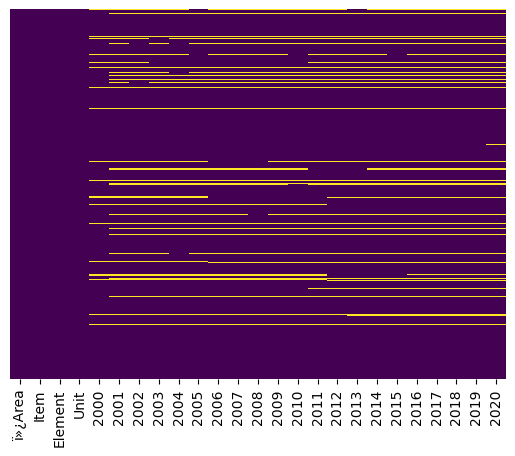

In [18]:
sns.heatmap(df_foodEmissions.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
df_foodEmissions = pd.melt(df_foodEmissions, id_vars=['ï»¿Area', 'Item', 'Element', 'Unit'], var_name='Year', value_name='Value')
df_foodEmissions

,ï»¿Area,Item,Element,Unit,Year,Value
0,Afghanistan,Crop Residues,Direct emissions (N2O),kilotonnes,2000,5.200000e-01
1,Afghanistan,Crop Residues,Indirect emissions (N2O),kilotonnes,2000,1.170000e-01
2,Afghanistan,Crop Residues,Emissions (N2O),kilotonnes,2000,6.370000e-01
3,Afghanistan,Crop Residues,Emissions (CO2eq) from N2O (AR5),kilotonnes,2000,1.688070e+02
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),kilotonnes,2000,1.688070e+02
...,...,...,...,...,...,...
1234060,OECD,All sectors without LULUCF,Emissions (CO2),kilotonnes,2020,1.088919e+07
1234061,OECD,All sectors without LULUCF,Emissions (CO2eq) from F-gases (AR5),kilotonnes,2020,9.208261e+05
1234062,OECD,All sectors without LULUCF,Emissions (CO2eq) from CH4 (AR5),kilotonnes,2020,1.825476e+06
1234063,OECD,All sectors without LULUCF,Emissions (CO2eq) from N2O (AR5),kilotonnes,2020,8.009744e+05


<Axes: >

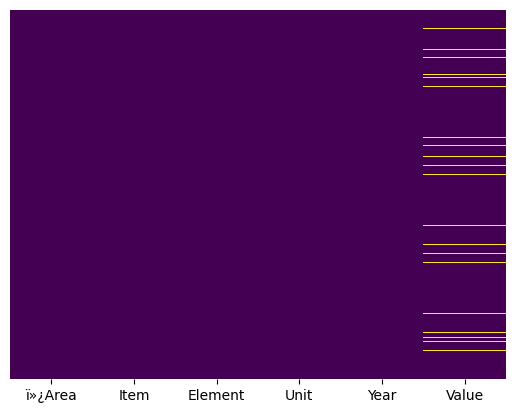

In [20]:
sns.heatmap(df_foodEmissions.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
# make a rename
df_foodEmissions = df_foodEmissions.rename(columns={"ï»¿Area": "Country", "Value": "Food_emissions"})
df_foodEmissions = df_foodEmissions.sort_values(by="Country")
df_foodEmissions['Year'] = df_foodEmissions['Year'].astype('int64')
df_foodEmissions

,Country,Item,Element,Unit,Year,Food_emissions
0,Afghanistan,Crop Residues,Direct emissions (N2O),kilotonnes,2000,0.5200
528898,Afghanistan,Burning - Crop residues,Emissions (CO2eq) from CH4 (AR5),kilotonnes,2009,NaN
528899,Afghanistan,Burning - Crop residues,Emissions (CO2eq) from N2O (AR5),kilotonnes,2009,23.7811
528900,Afghanistan,Burning - Crop residues,Emissions (CO2eq) from N2O (AR5),kilotonnes,2009,NaN
528901,Afghanistan,Burning - Crop residues,Emissions (CO2eq) (AR5),kilotonnes,2009,120.7005
...,...,...,...,...,...,...
168003,Zimbabwe,Manure left on Pasture,Emissions (N2O),kilotonnes,2002,10.5195
168002,Zimbabwe,Manure left on Pasture,Indirect emissions (N2O),kilotonnes,2002,2.0238
168001,Zimbabwe,Manure left on Pasture,Direct emissions (N2O),kilotonnes,2002,8.4957
1049445,Zimbabwe,Crop Residues,Emissions (CO2eq) from N2O (AR5),kilotonnes,2017,108.6262


In [22]:
df_foodEmissions.nunique()

Country              280
Item                  42
Element                9
Unit                   1
Year                  21
Food_emissions    508269
dtype: int64

---------------------

In [23]:
df_fao

,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference,url,notes
0,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2009,5.22,5.22%,68100,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
1,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2008,5.43,5.43%,65240,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
2,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2007,5.61,5.61%,61080,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
3,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2006,5.40,5.4%,55270,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
4,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2005,5.00,5%,51970,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27768,894,Zambia,NaN,0118,Millet,2000,1.27,1.27,NaN,Storage,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
27769,894,Zambia,NaN,0118,Millet,2000,2.50,2.5,NaN,Winnowing,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
27770,894,Zambia,NaN,0118,Millet,2000,1.00,1,NaN,Transportation,Transport,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
27771,894,Zambia,NaN,0118,Millet,2000,2.38,2.38,NaN,Storage,Storage,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN


<Axes: >

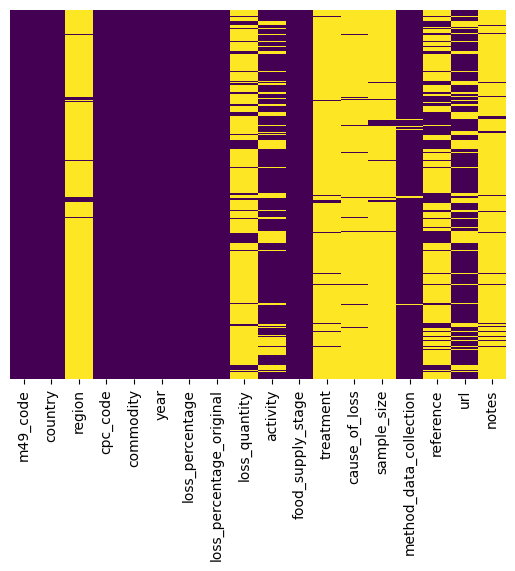

In [24]:
sns.heatmap(df_fao.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [25]:
df_fao = df_fao.rename(columns={"country": "Country", "year": "Year"})
df_fao = df_fao.drop(['m49_code', 'region', 'cpc_code', 'url', 'notes'], axis=1)
df_fao

,Country,commodity,Year,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference
0,Myanmar,"Groundnuts, excluding shelled",2009,5.22,5.22%,68100,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources
1,Myanmar,"Groundnuts, excluding shelled",2008,5.43,5.43%,65240,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources
2,Myanmar,"Groundnuts, excluding shelled",2007,5.61,5.61%,61080,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources
3,Myanmar,"Groundnuts, excluding shelled",2006,5.40,5.4%,55270,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources
4,Myanmar,"Groundnuts, excluding shelled",2005,5.00,5%,51970,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27768,Zambia,Millet,2000,1.27,1.27,NaN,Storage,Farm,NaN,NaN,NaN,Modelled Estimates,NaN
27769,Zambia,Millet,2000,2.50,2.5,NaN,Winnowing,Farm,NaN,NaN,NaN,Modelled Estimates,NaN
27770,Zambia,Millet,2000,1.00,1,NaN,Transportation,Transport,NaN,NaN,NaN,Modelled Estimates,NaN
27771,Zambia,Millet,2000,2.38,2.38,NaN,Storage,Storage,NaN,NaN,NaN,Modelled Estimates,NaN


# Merge 1
Aqui fazemos o merge dos datasets foodEmissions e foodProduction por tipo de comida

In [26]:
#sns.heatmap(df_foodEmiProd.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# dataset ghg

In [27]:
df_ghg.head()

,Entity,Code,Year,"GHG emissions per kilogram (Poore & Nemecek, 2018)"
0,Apples,NaN,2010,0.43
1,Bananas,NaN,2010,0.86
2,Barley,NaN,2010,1.18
3,Beef (beef herd),NaN,2010,99.48
4,Beef (dairy herd),NaN,2010,33.30


In [28]:
# make a rename
df_ghg = df_ghg.rename(columns={"Entity": "Food", "GHG emissions per kilogram (Poore & Nemecek, 2018)": "Total_emission_GHG"})
to_drop = ["Code"]
df_ghg = df_ghg.drop(to_drop, axis=1)

In [29]:
df_ghg["Food"].value_counts().sort_index()

Food
Apples               1
Bananas              1
Barley               1
Beef (beef herd)     1
Beef (dairy herd)    1
Beet Sugar           1
Berries & Grapes     1
Brassicas            1
Cane Sugar           1
Cassava              1
Cheese               1
Citrus Fruit         1
Coffee               1
Dark Chocolate       1
Eggs                 1
Fish (farmed)        1
Groundnuts           1
Lamb & Mutton        1
Maize                1
Milk                 1
Nuts                 1
Oatmeal              1
Onions & Leeks       1
Other Fruit          1
Other Pulses         1
Other Vegetables     1
Peas                 1
Pig Meat             1
Potatoes             1
Poultry Meat         1
Prawns (farmed)      1
Rice                 1
Root Vegetables      1
Soy milk             1
Tofu                 1
Tomatoes             1
Wheat & Rye          1
Wine                 1
Name: count, dtype: int64

In [30]:
# rename

df_ghg['Food'] = df_ghg['Food'].replace({'Barley': 'Barley (Beer)','Maize':'Maize (Meal)','Wheat & Rye':'Wheat & Rye (Bread)'})

df_ghg["Food"].value_counts().sort_index()

Food
Apples                 1
Bananas                1
Barley (Beer)          1
Beef (beef herd)       1
Beef (dairy herd)      1
Beet Sugar             1
Berries & Grapes       1
Brassicas              1
Cane Sugar             1
Cassava                1
Cheese                 1
Citrus Fruit           1
Coffee                 1
Dark Chocolate         1
Eggs                   1
Fish (farmed)          1
Groundnuts             1
Lamb & Mutton          1
Maize (Meal)           1
Milk                   1
Nuts                   1
Oatmeal                1
Onions & Leeks         1
Other Fruit            1
Other Pulses           1
Other Vegetables       1
Peas                   1
Pig Meat               1
Potatoes               1
Poultry Meat           1
Prawns (farmed)        1
Rice                   1
Root Vegetables        1
Soy milk               1
Tofu                   1
Tomatoes               1
Wheat & Rye (Bread)    1
Wine                   1
Name: count, dtype: int64

# Merge 2
Aqui fazemos o merge do ghg com o df_foodEmiProd

In [31]:
#sns.heatmap(df2_food.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [32]:
# drop dos alimentos que têm mais NaN
#to_drop = ["Code"]
#df_ghg = df_ghg.drop(to_drop, axis=1)
#df2_food = df2_food.drop(2)
#df2_food = df2_food.drop(18)
#df2_food = df2_food.drop(25)
#df2_food = df2_food.drop(30)
#df2_food = df2_food.drop(33)
#df2_food = df2_food.drop(34)
#df2_food = df2_food.drop(36)
#df2_food

# dataset waterWithdrawals

In [33]:
df_waterWithdrawals.head()

,Entity,Code,Year,"Freshwater withdrawals per kilogram (Poore & Nemecek, 2018)"
0,Apples,NaN,2010,180.1
1,Bananas,NaN,2010,114.5
2,Barley,NaN,2010,17.1
3,Beef (beef herd),NaN,2010,1451.2
4,Beef (dairy herd),NaN,2010,2714.3


In [34]:
# make a rename
df_waterWithdrawals = df_waterWithdrawals.rename(columns={"Entity": "Food", "Freshwater withdrawals per kilogram (Poore & Nemecek, 2018)": "Freshwater_withdrawals_per_Kg"})
to_drop = ["Code"]
df_waterWithdrawals = df_waterWithdrawals.drop(to_drop, axis=1)

In [35]:
#df_waterWithdrawals["Food"].value_counts().sort_index()
df_waterWithdrawals['Food'] = df_waterWithdrawals['Food'].replace({'Barley': 'Barley (Beer)','Maize':'Maize (Meal)','Wheat & Rye':'Wheat & Rye (Bread)'})

df_ghg["Food"].value_counts().sort_index()

Food
Apples                 1
Bananas                1
Barley (Beer)          1
Beef (beef herd)       1
Beef (dairy herd)      1
Beet Sugar             1
Berries & Grapes       1
Brassicas              1
Cane Sugar             1
Cassava                1
Cheese                 1
Citrus Fruit           1
Coffee                 1
Dark Chocolate         1
Eggs                   1
Fish (farmed)          1
Groundnuts             1
Lamb & Mutton          1
Maize (Meal)           1
Milk                   1
Nuts                   1
Oatmeal                1
Onions & Leeks         1
Other Fruit            1
Other Pulses           1
Other Vegetables       1
Peas                   1
Pig Meat               1
Potatoes               1
Poultry Meat           1
Prawns (farmed)        1
Rice                   1
Root Vegetables        1
Soy milk               1
Tofu                   1
Tomatoes               1
Wheat & Rye (Bread)    1
Wine                   1
Name: count, dtype: int64

# Merge 3

In [36]:
#sns.heatmap(df3_food.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Merge 4
aqui fazemos o merge do dataset agroFood e co2Deforest

In [37]:
#sns.heatmap(df3_agroCO2Deforest.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# dataset foodLoss + continente

In [38]:
df_foodLoss

,Entity,Code,Year,12.3.1 - Global food loss index - AG_FLS_INDEX
0,Central and Southern Asia (UN),NaN,2016,96.76
1,Central and Southern Asia (UN),NaN,2020,94.91
2,Central and Southern Asia (UN),NaN,2021,88.70
3,Eastern and South-Eastern Asia (UN),NaN,2016,99.06
4,Eastern and South-Eastern Asia (UN),NaN,2020,99.48
5,Eastern and South-Eastern Asia (UN),NaN,2021,99.97
6,Europe and Northern America (UN),NaN,2016,99.49
7,Europe and Northern America (UN),NaN,2020,106.53
8,Europe and Northern America (UN),NaN,2021,100.94
9,Latin America and the Caribbean (UN),NaN,2016,99.84


In [39]:
# make a rename
df_foodLoss = df_foodLoss.rename(columns={"Entity": "sub-region", "12.3.1 - Global food loss index - AG_FLS_INDEX": "Global_food_loss_index"})
to_drop = ["Code"]
df_foodLoss = df_foodLoss.drop(to_drop, axis=1)

In [40]:
df_foodLoss.head()

,sub-region,Year,Global_food_loss_index
0,Central and Southern Asia (UN),2016,96.76
1,Central and Southern Asia (UN),2020,94.91
2,Central and Southern Asia (UN),2021,88.70
3,Eastern and South-Eastern Asia (UN),2016,99.06
4,Eastern and South-Eastern Asia (UN),2020,99.48


In [41]:
df_foodLoss['sub-region'] = df_foodLoss['sub-region'].replace({'Northen Africa (UN)':'Northen Africa', 'Northern America (UN)':'Northern America', 'Sub-Saharan Africa (UN)':'Sub-Saharan Africa', 'Latin America and the Caribbean (UN)':'Latin America and the Caribbean', 'Central and Southern Asia (UN)':'Central and Southern Asia', 'Eastern and South-Eastern Asia (UN)': 'Eastern and South-Eastern Asia', 'Europe and Northern America (UN)':'Europe and Northern America', 'Least Developed Countries (LDCs)':'Least Developed Countries', 'Small Island Developing States (SIDS)':'Small Island Developing States'})
df_foodLoss
#df_foodEmissions['Food'] = df_foodEmissions['Food'].replace({'Ham': 'NewFood'})

,sub-region,Year,Global_food_loss_index
0,Central and Southern Asia,2016,96.76
1,Central and Southern Asia,2020,94.91
2,Central and Southern Asia,2021,88.70
3,Eastern and South-Eastern Asia,2016,99.06
4,Eastern and South-Eastern Asia,2020,99.48
5,Eastern and South-Eastern Asia,2021,99.97
6,Europe and Northern America,2016,99.49
7,Europe and Northern America,2020,106.53
8,Europe and Northern America,2021,100.94
9,Latin America and the Caribbean,2016,99.84


In [42]:
df_continents.rename(columns={'ï»¿name': 'Country'}, inplace=True)
#df_continents
df_continents["sub-region"].value_counts().sort_index()
df_continents['sub-region'] = df_continents['sub-region'].replace({'Central Asia': 'Central and Southern Asia','Southern Asia ':'Central and Southern Asia','Eastern Asia':'Eastern and South-Eastern Asia','South-eastern Asia':'Eastern and South-Eastern Asia','Eastern Europe':'Europe and Northern America','Northern America':'Europe and Northern America',
                                                                     'Southern Europe':'Europe and Northern America','Northern Europe':'Europe and Northern America','Western Europe':'Europe and Northern America'})
#df_ghg["Food"].value_counts().sort_index()
df_continents

,Country,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Ã land Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Europe and Northern America,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Europe and Northern America,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,NaN,9.0,61.0,NaN
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,NaN,2.0,15.0,NaN
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,NaN,142.0,145.0,NaN
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


In [43]:
columns_to_keep = ['Country', 'sub-region']  
df_continents.drop(columns=df_continents.columns.difference(columns_to_keep), inplace=True)
df_continents

,Country,sub-region
0,Afghanistan,Southern Asia
1,Ã land Islands,Europe and Northern America
2,Albania,Europe and Northern America
3,Algeria,Northern Africa
4,American Samoa,Polynesia
...,...,...
244,Wallis and Futuna,Polynesia
245,Western Sahara,Northern Africa
246,Yemen,Western Asia
247,Zambia,Sub-Saharan Africa


### *Tratar do dataset de global food2*

In [44]:
df_globalFood2

,Product,Country,Year,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Yield (kg/animal),Land Use (ha),area_harvested__ha__per_capita,Land Use per capita (mÂ²),Producing or slaughtered animals,Producing or slaughtered animals per capita,Imports (t),imports__tonnes__per_capita,Imports per capita (kg),Exports (t),exports__tonnes__per_capita,Exports per capita (kg),Domestic supply (t),domestic_supply__tonnes__per_capita,Domestic supply per capita (kg),Food (t),food__tonnes__per_capita,Food per capita (kg),Animal feed (t),feed__tonnes__per_capita,Animal feed per capita (kg),Other uses (t),other_uses__tonnes__per_capita,Other uses per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
0,NaN,Afghanistan,1961,8790140.0,291300.00,0.033139,33.139404,4.2402,NaN,68700.0,0.007816,78.155750,NaN,NaN,0.0,0.000000,0.000000,0.0,0.000000,0.000000,370000.0,0.042093,42.092618,329000.0,0.037428,37.428300,NaN,NaN,NaN,NaN,NaN,NaN,41000.0,0.004664,4.664317,37.435070,102.561835,22.410109,1.201997,0.183355
1,NaN,Afghanistan,1962,8969055.0,306300.00,0.034151,34.150753,4.4585,NaN,68700.0,0.007660,76.596700,NaN,NaN,0.0,0.000000,0.000000,0.0,0.000000,0.000000,385000.0,0.042925,42.925370,343000.0,0.038243,38.242600,NaN,NaN,NaN,NaN,NaN,NaN,42000.0,0.004683,4.682768,38.192513,104.637021,22.424213,1.233332,0.193664
2,NaN,Afghanistan,1963,9157463.0,324600.00,0.035446,35.446500,4.7249,NaN,68700.0,0.007502,75.020776,NaN,NaN,0.0,0.000000,0.000000,0.0,0.000000,0.000000,408000.0,0.044554,44.553824,363000.0,0.039640,39.639800,NaN,NaN,NaN,NaN,NaN,NaN,45000.0,0.004914,4.914025,39.644800,108.615889,23.458462,1.285116,0.193787
3,NaN,Afghanistan,1964,9355510.0,342900.00,0.036652,36.652196,4.6526,NaN,73700.0,0.007878,78.777100,NaN,NaN,0.0,0.000000,0.000000,0.0,0.000000,0.000000,431000.0,0.046069,46.069108,383000.0,0.040938,40.938440,NaN,NaN,NaN,NaN,NaN,NaN,48000.0,0.005131,5.130666,40.992203,112.307404,24.491236,1.326609,0.204094
4,NaN,Afghanistan,1965,9565154.0,357500.00,0.037375,37.375250,4.4856,NaN,79700.0,0.008332,83.323280,NaN,NaN,0.0,0.000000,0.000000,0.0,0.000000,0.000000,448000.0,0.046837,46.836674,399000.0,0.041714,41.713912,NaN,NaN,NaN,NaN,NaN,NaN,49000.0,0.005123,5.122761,41.683067,114.200182,24.501434,1.347579,0.204179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14057,NaN,Zimbabwe,2017,14751101.0,232628.50,0.015770,15.770247,6.7140,NaN,34648.0,0.002349,23.488416,NaN,NaN,6000.0,0.000407,0.406749,2000.0,0.000136,0.135583,238000.0,0.016134,16.134389,220000.0,0.014914,14.914141,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,0.001356,1.355831,14.882158,40.773035,9.651205,0.569421,0.086861
14058,NaN,Zimbabwe,2018,15052191.0,236034.77,0.015681,15.681090,6.6013,NaN,35756.0,0.002375,23.754681,NaN,NaN,3000.0,0.000199,0.199307,5000.0,0.000332,0.332178,236000.0,0.015679,15.678780,219000.0,0.014549,14.549376,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,0.001329,1.328710,14.570992,39.920526,9.592490,0.556364,0.086332
14059,NaN,Zimbabwe,2019,15354606.0,233508.66,0.015208,15.207727,6.6678,NaN,35020.0,0.002281,22.807490,NaN,NaN,1000.0,0.000065,0.065127,6000.0,0.000391,0.390762,224000.0,0.014588,14.588457,207000.0,0.013481,13.481297,NaN,NaN,NaN,NaN,NaN,NaN,19000.0,0.001237,1.237414,13.496497,36.976704,9.538160,0.524599,0.076305
14060,NaN,Zimbabwe,2020,15669663.0,234587.97,0.014971,14.970837,6.5932,NaN,35580.0,0.002271,22.706296,NaN,NaN,1000.0,0.000064,0.063818,6000.0,0.000383,0.382905,223000.0,0.014231,14.231321,207000.0,0.013210,13.210240,NaN,NaN,NaN,NaN,NaN,NaN,19000.0,0.001213,1.212534,13.212823,36.199515,9.485156,0.512198,0.075881


In [45]:
df_globalFood2 = df_globalFood2[df_globalFood2['Year'] >= 2010]
df_globalFood2

,Product,Country,Year,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Yield (kg/animal),Land Use (ha),area_harvested__ha__per_capita,Land Use per capita (mÂ²),Producing or slaughtered animals,Producing or slaughtered animals per capita,Imports (t),imports__tonnes__per_capita,Imports per capita (kg),Exports (t),exports__tonnes__per_capita,Exports per capita (kg),Domestic supply (t),domestic_supply__tonnes__per_capita,Domestic supply per capita (kg),Food (t),food__tonnes__per_capita,Food per capita (kg),Animal feed (t),feed__tonnes__per_capita,Animal feed per capita (kg),Other uses (t),other_uses__tonnes__per_capita,Other uses per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
49,NaN,Afghanistan,2010,28189672.0,969763.10,0.034401,34.401360,10.670199,NaN,90885.0,0.003224,32.240532,NaN,NaN,10000.0,0.000355,0.354740,149000.0,0.005286,5.285624,1438000.0,0.051012,51.011592,1271000.0,0.045087,45.087434,NaN,NaN,NaN,NaN,NaN,NaN,167000.0,0.005924,5.924156,45.078865,123.503738,28.989624,1.190645,0.196715
50,NaN,Afghanistan,2011,29249156.0,762948.50,0.026084,26.084462,10.309299,NaN,74006.0,0.002530,25.301927,NaN,NaN,127000.0,0.004342,4.342006,73000.0,0.002496,2.495799,1274000.0,0.043557,43.556813,1146000.0,0.039181,39.180618,NaN,NaN,NaN,NaN,NaN,NaN,129000.0,0.004410,4.410384,39.178970,107.339643,24.712097,1.081154,0.175044
51,NaN,Afghanistan,2012,30466484.0,817743.50,0.026841,26.840758,10.229700,NaN,79938.0,0.002624,26.238014,NaN,NaN,97000.0,0.003184,3.183827,28000.0,0.000919,0.919043,1301000.0,0.042703,42.702664,1174000.0,0.038534,38.534150,NaN,NaN,NaN,NaN,NaN,NaN,127000.0,0.004169,4.168515,38.538956,105.586180,24.547106,1.104620,0.184103
52,NaN,Afghanistan,2013,31541216.0,790266.94,0.025055,25.055056,10.026000,NaN,78821.0,0.002499,24.989840,NaN,NaN,122000.0,0.003868,3.867955,37000.0,0.001173,1.173068,1231000.0,0.039028,39.028298,1117000.0,0.035414,35.413980,NaN,NaN,NaN,NaN,NaN,NaN,117000.0,0.003709,3.709432,35.419920,97.040876,22.508327,1.053799,0.173928
53,NaN,Afghanistan,2014,32716214.0,973721.60,0.029763,29.762663,9.740900,NaN,99962.0,0.003055,30.554270,NaN,NaN,323000.0,0.009873,9.872780,68000.0,0.002078,2.078480,1792000.0,0.054774,54.774065,1630000.0,0.049822,49.822390,NaN,NaN,NaN,NaN,NaN,NaN,167000.0,0.005105,5.104503,49.817490,136.486273,33.660465,1.560622,0.265204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14057,NaN,Zimbabwe,2017,14751101.0,232628.50,0.015770,15.770247,6.714000,NaN,34648.0,0.002349,23.488416,NaN,NaN,6000.0,0.000407,0.406749,2000.0,0.000136,0.135583,238000.0,0.016134,16.134389,220000.0,0.014914,14.914141,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,0.001356,1.355831,14.882158,40.773035,9.651205,0.569421,0.086861
14058,NaN,Zimbabwe,2018,15052191.0,236034.77,0.015681,15.681090,6.601300,NaN,35756.0,0.002375,23.754681,NaN,NaN,3000.0,0.000199,0.199307,5000.0,0.000332,0.332178,236000.0,0.015679,15.678780,219000.0,0.014549,14.549376,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,0.001329,1.328710,14.570992,39.920526,9.592490,0.556364,0.086332
14059,NaN,Zimbabwe,2019,15354606.0,233508.66,0.015208,15.207727,6.667800,NaN,35020.0,0.002281,22.807490,NaN,NaN,1000.0,0.000065,0.065127,6000.0,0.000391,0.390762,224000.0,0.014588,14.588457,207000.0,0.013481,13.481297,NaN,NaN,NaN,NaN,NaN,NaN,19000.0,0.001237,1.237414,13.496497,36.976704,9.538160,0.524599,0.076305
14060,NaN,Zimbabwe,2020,15669663.0,234587.97,0.014971,14.970837,6.593200,NaN,35580.0,0.002271,22.706296,NaN,NaN,1000.0,0.000064,0.063818,6000.0,0.000383,0.382905,223000.0,0.014231,14.231321,207000.0,0.013210,13.210240,NaN,NaN,NaN,NaN,NaN,NaN,19000.0,0.001213,1.212534,13.212823,36.199

<Axes: >

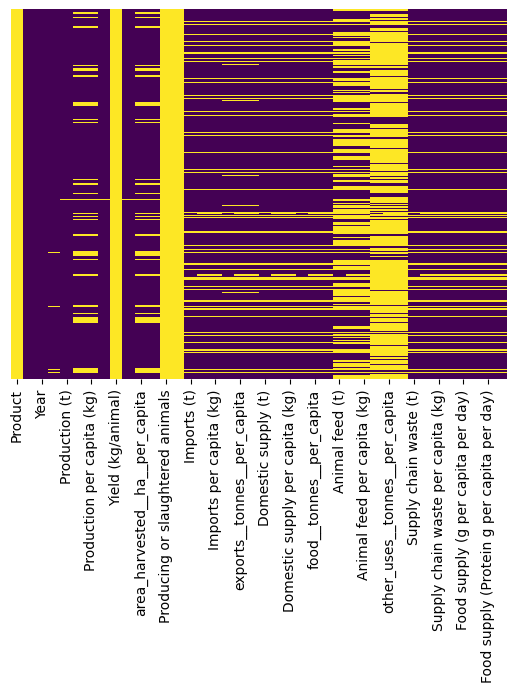

In [46]:
sns.heatmap(df_globalFood2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [47]:
to_drop = ['Product', 'Yield (kg/animal)','Producing or slaughtered animals','Producing or slaughtered animals per capita','Animal feed (t)',
           'feed__tonnes__per_capita', 'Animal feed per capita (kg)', 'Other uses (t)', 'other_uses__tonnes__per_capita', 'Other uses per capita (kg)']
df_globalFood2 = df_globalFood2.drop(to_drop, axis=1)
df_globalFood2

,Country,Year,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Land Use (ha),area_harvested__ha__per_capita,Land Use per capita (mÂ²),Imports (t),imports__tonnes__per_capita,Imports per capita (kg),Exports (t),exports__tonnes__per_capita,Exports per capita (kg),Domestic supply (t),domestic_supply__tonnes__per_capita,Domestic supply per capita (kg),Food (t),food__tonnes__per_capita,Food per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
49,Afghanistan,2010,28189672.0,969763.10,0.034401,34.401360,10.670199,90885.0,0.003224,32.240532,10000.0,0.000355,0.354740,149000.0,0.005286,5.285624,1438000.0,0.051012,51.011592,1271000.0,0.045087,45.087434,167000.0,0.005924,5.924156,45.078865,123.503738,28.989624,1.190645,0.196715
50,Afghanistan,2011,29249156.0,762948.50,0.026084,26.084462,10.309299,74006.0,0.002530,25.301927,127000.0,0.004342,4.342006,73000.0,0.002496,2.495799,1274000.0,0.043557,43.556813,1146000.0,0.039181,39.180618,129000.0,0.004410,4.410384,39.178970,107.339643,24.712097,1.081154,0.175044
51,Afghanistan,2012,30466484.0,817743.50,0.026841,26.840758,10.229700,79938.0,0.002624,26.238014,97000.0,0.003184,3.183827,28000.0,0.000919,0.919043,1301000.0,0.042703,42.702664,1174000.0,0.038534,38.534150,127000.0,0.004169,4.168515,38.538956,105.586180,24.547106,1.104620,0.184103
52,Afghanistan,2013,31541216.0,790266.94,0.025055,25.055056,10.026000,78821.0,0.002499,24.989840,122000.0,0.003868,3.867955,37000.0,0.001173,1.173068,1231000.0,0.039028,39.028298,1117000.0,0.035414,35.413980,117000.0,0.003709,3.709432,35.419920,97.040876,22.508327,1.053799,0.173928
53,Afghanistan,2014,32716214.0,973721.60,0.029763,29.762663,9.740900,99962.0,0.003055,30.554270,323000.0,0.009873,9.872780,68000.0,0.002078,2.078480,1792000.0,0.054774,54.774065,1630000.0,0.049822,49.822390,167000.0,0.005105,5.104503,49.817490,136.486273,33.660465,1.560622,0.265204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14057,Zimbabwe,2017,14751101.0,232628.50,0.015770,15.770247,6.714000,34648.0,0.002349,23.488416,6000.0,0.000407,0.406749,2000.0,0.000136,0.135583,238000.0,0.016134,16.134389,220000.0,0.014914,14.914141,20000.0,0.001356,1.355831,14.882158,40.773035,9.651205,0.569421,0.086861
14058,Zimbabwe,2018,15052191.0,236034.77,0.015681,15.681090,6.601300,35756.0,0.002375,23.754681,3000.0,0.000199,0.199307,5000.0,0.000332,0.332178,236000.0,0.015679,15.678780,219000.0,0.014549,14.549376,20000.0,0.001329,1.328710,14.570992,39.920526,9.592490,0.556364,0.086332
14059,Zimbabwe,2019,15354606.0,233508.66,0.015208,15.207727,6.667800,35020.0,0.002281,22.807490,1000.0,0.000065,0.065127,6000.0,0.000391,0.390762,224000.0,0.014588,14.588457,207000.0,0.013481,13.481297,19000.0,0.001237,1.237414,13.496497,36.976704,9.538160,0.524599,0.076305
14060,Zimbabwe,2020,15669663.0,234587.97,0.014971,14.970837,6.593200,35580.0,0.002271,22.706296,1000.0,0.000064,0.063818,6000.0,0.000383,0.382905,223000.0,0.014231,14.231321,207000.0,0.013210,13.210240,19000.0,0.001213,1.212534,13.212823,36.199515,9.485156,0.512198,0.075881


<Axes: >

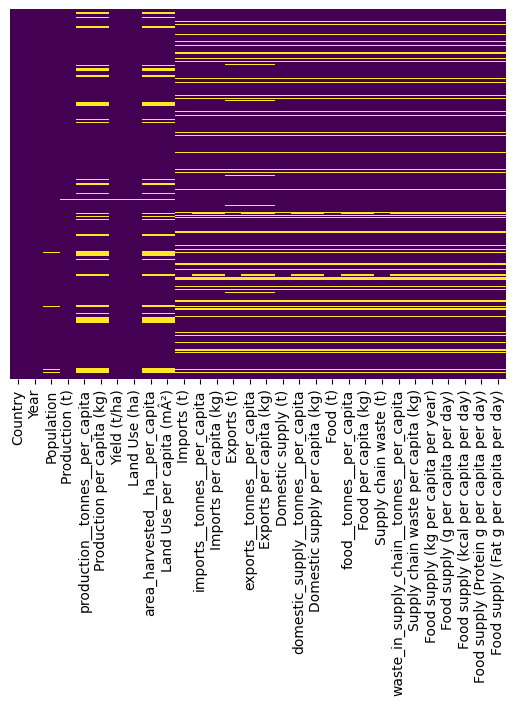

In [48]:
sns.heatmap(df_globalFood2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Merge com pandas
Aqui vamos fazer o merge dos datasets e verificar o seu tempo

### Pandas merge

In [49]:
start_time = time.time()

df1 = pd.merge(df_agroFood, df_foodEmissions, on=['Country', 'Year'], how='inner')
df2 = pd.merge(df1, df_globalFood2, on=['Country', 'Year'], how='inner')
dfinal = pd.merge(df2, df_fao, on=['Country', 'Year'], how='inner')
# dfinal: info entre 2010-2020

elapsed_time = time.time() - start_time

# Exiba o resultado e o tempo decorrido
print(f"Tempo decorrido para o merge: {elapsed_time:.6f} segundos")

Tempo decorrido para o merge: 2.499958 segundos


### PySpark merge

In [50]:
# Crie uma sessão Spark
spark = SparkSession.builder.appName("merge_example").getOrCreate()

# Carregue os DataFrames PySpark
df_agroFood_spark = spark.createDataFrame(df_agroFood)
df_foodEmissions_spark = spark.createDataFrame(df_foodEmissions)
df_globalFood2_spark = spark.createDataFrame(df_globalFood2)
df_fao_spark = spark.createDataFrame(df_fao)

# Inicie o cronômetro
start_time = time.time()

# Realize os merges usando PySpark
df1_spark = df_agroFood_spark.join(df_foodEmissions_spark, ['Country', 'Year'], 'inner')
df2_spark = df1_spark.join(df_globalFood2_spark, ['Country', 'Year'], 'inner')
dfinal_spark = df2_spark.join(df_fao_spark, ['Country', 'Year'], 'inner')

# Pare o cronômetro
elapsed_time_pyspark = time.time() - start_time

#dfinal_spark.show()
print(f"Tempo decorrido para o merge (PySpark): {elapsed_time_pyspark:.6f} segundos")

# Pare a sessão Spark
spark.stop()

24/02/29 23:05:06 WARN Utils: Your hostname, catarina-Zenbook-UM3402YA-UM3402YA resolves to a loopback address: 127.0.1.1; using 192.168.1.130 instead (on interface wlp1s0)
24/02/29 23:05:07 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/02/29 23:05:07 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Tempo decorrido para o merge (PySpark): 0.170093 segundos


In [51]:
df_agroFood

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Emissions_food,Average Temperature Â°C
20,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.610850,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,NaN,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.529250
21,Afghanistan,2011,1.8412,0.0000,335.0379,823.2000,0.0,81.610850,478.8137,-246.2191,0.0000,522.6275,270.6066,50.4527,339.833670,2610.1325,1299.824095,32.492700,192.3717,449.4714,2840.2660,843.1709,0.0,0.0,NaN,22594126.0,7114473.0,14780282.0,14468875.0,10925.534316,1.254583
22,Afghanistan,2012,2.8955,0.0000,445.5958,803.6000,0.0,107.386444,530.8213,-246.2191,0.0000,534.4065,271.2397,47.1675,339.833670,2743.2372,1326.917597,29.443300,266.4513,441.8546,2798.7363,836.9089,0.0,0.0,NaN,23280663.0,7416295.0,15399105.0,15067373.0,11280.276511,0.344167
23,Afghanistan,2013,3.1595,0.0000,455.0727,803.6000,0.0,76.061874,391.0777,-246.2191,0.0000,833.2319,276.2396,66.6996,353.930640,2870.4764,1441.160481,29.981400,333.5334,432.0026,2741.0994,832.8961,0.0,0.0,NaN,23997856.0,7733832.0,15946572.0,15594637.0,11694.004195,1.290917
24,Afghanistan,2014,2.6796,0.0000,473.4174,862.4000,0.0,49.782873,304.1804,-246.2191,0.0000,1094.1338,333.4255,78.6716,353.930640,2976.2524,1484.197070,28.639400,282.6155,437.6203,2770.4672,842.5037,0.0,0.0,NaN,24703798.0,8054222.0,16543889.0,16172321.0,12128.698284,0.468667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,10662.4408,251.2681,443.0872,428.4352,22.910800,1077.2392,317.074400,2585.080847,858.9820,96.1332,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,10662.4408,203.1236,445.3881,304.7852,18.985700,1093.3441,332.775900,1227.240253,889.4250,81.2314,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,10662.4408,211.1539,492.8599,346.8512,19.057000,1108.5523,348.510700,1127.687805,966.2650,81.0712,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,10662.4408,228.6381,542.5922,350.2168,17.951400,1121.3255,327.820900,2485.528399,945.9420,85.7211,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [52]:
df_foodEmissions

,Country,Item,Element,Unit,Year,Food_emissions
0,Afghanistan,Crop Residues,Direct emissions (N2O),kilotonnes,2000,0.5200
528898,Afghanistan,Burning - Crop residues,Emissions (CO2eq) from CH4 (AR5),kilotonnes,2009,NaN
528899,Afghanistan,Burning - Crop residues,Emissions (CO2eq) from N2O (AR5),kilotonnes,2009,23.7811
528900,Afghanistan,Burning - Crop residues,Emissions (CO2eq) from N2O (AR5),kilotonnes,2009,NaN
528901,Afghanistan,Burning - Crop residues,Emissions (CO2eq) (AR5),kilotonnes,2009,120.7005
...,...,...,...,...,...,...
168003,Zimbabwe,Manure left on Pasture,Emissions (N2O),kilotonnes,2002,10.5195
168002,Zimbabwe,Manure left on Pasture,Indirect emissions (N2O),kilotonnes,2002,2.0238
168001,Zimbabwe,Manure left on Pasture,Direct emissions (N2O),kilotonnes,2002,8.4957
1049445,Zimbabwe,Crop Residues,Emissions (CO2eq) from N2O (AR5),kilotonnes,2017,108.6262


In [53]:
df_globalFood2

,Country,Year,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Land Use (ha),area_harvested__ha__per_capita,Land Use per capita (mÂ²),Imports (t),imports__tonnes__per_capita,Imports per capita (kg),Exports (t),exports__tonnes__per_capita,Exports per capita (kg),Domestic supply (t),domestic_supply__tonnes__per_capita,Domestic supply per capita (kg),Food (t),food__tonnes__per_capita,Food per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
49,Afghanistan,2010,28189672.0,969763.10,0.034401,34.401360,10.670199,90885.0,0.003224,32.240532,10000.0,0.000355,0.354740,149000.0,0.005286,5.285624,1438000.0,0.051012,51.011592,1271000.0,0.045087,45.087434,167000.0,0.005924,5.924156,45.078865,123.503738,28.989624,1.190645,0.196715
50,Afghanistan,2011,29249156.0,762948.50,0.026084,26.084462,10.309299,74006.0,0.002530,25.301927,127000.0,0.004342,4.342006,73000.0,0.002496,2.495799,1274000.0,0.043557,43.556813,1146000.0,0.039181,39.180618,129000.0,0.004410,4.410384,39.178970,107.339643,24.712097,1.081154,0.175044
51,Afghanistan,2012,30466484.0,817743.50,0.026841,26.840758,10.229700,79938.0,0.002624,26.238014,97000.0,0.003184,3.183827,28000.0,0.000919,0.919043,1301000.0,0.042703,42.702664,1174000.0,0.038534,38.534150,127000.0,0.004169,4.168515,38.538956,105.586180,24.547106,1.104620,0.184103
52,Afghanistan,2013,31541216.0,790266.94,0.025055,25.055056,10.026000,78821.0,0.002499,24.989840,122000.0,0.003868,3.867955,37000.0,0.001173,1.173068,1231000.0,0.039028,39.028298,1117000.0,0.035414,35.413980,117000.0,0.003709,3.709432,35.419920,97.040876,22.508327,1.053799,0.173928
53,Afghanistan,2014,32716214.0,973721.60,0.029763,29.762663,9.740900,99962.0,0.003055,30.554270,323000.0,0.009873,9.872780,68000.0,0.002078,2.078480,1792000.0,0.054774,54.774065,1630000.0,0.049822,49.822390,167000.0,0.005105,5.104503,49.817490,136.486273,33.660465,1.560622,0.265204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14057,Zimbabwe,2017,14751101.0,232628.50,0.015770,15.770247,6.714000,34648.0,0.002349,23.488416,6000.0,0.000407,0.406749,2000.0,0.000136,0.135583,238000.0,0.016134,16.134389,220000.0,0.014914,14.914141,20000.0,0.001356,1.355831,14.882158,40.773035,9.651205,0.569421,0.086861
14058,Zimbabwe,2018,15052191.0,236034.77,0.015681,15.681090,6.601300,35756.0,0.002375,23.754681,3000.0,0.000199,0.199307,5000.0,0.000332,0.332178,236000.0,0.015679,15.678780,219000.0,0.014549,14.549376,20000.0,0.001329,1.328710,14.570992,39.920526,9.592490,0.556364,0.086332
14059,Zimbabwe,2019,15354606.0,233508.66,0.015208,15.207727,6.667800,35020.0,0.002281,22.807490,1000.0,0.000065,0.065127,6000.0,0.000391,0.390762,224000.0,0.014588,14.588457,207000.0,0.013481,13.481297,19000.0,0.001237,1.237414,13.496497,36.976704,9.538160,0.524599,0.076305
14060,Zimbabwe,2020,15669663.0,234587.97,0.014971,14.970837,6.593200,35580.0,0.002271,22.706296,1000.0,0.000064,0.063818,6000.0,0.000383,0.382905,223000.0,0.014231,14.231321,207000.0,0.013210,13.210240,19000.0,0.001213,1.212534,13.212823,36.199515,9.485156,0.512198,0.075881


In [54]:
df_fao

,Country,commodity,Year,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference
0,Myanmar,"Groundnuts, excluding shelled",2009,5.22,5.22%,68100,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources
1,Myanmar,"Groundnuts, excluding shelled",2008,5.43,5.43%,65240,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources
2,Myanmar,"Groundnuts, excluding shelled",2007,5.61,5.61%,61080,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources
3,Myanmar,"Groundnuts, excluding shelled",2006,5.40,5.4%,55270,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources
4,Myanmar,"Groundnuts, excluding shelled",2005,5.00,5%,51970,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27768,Zambia,Millet,2000,1.27,1.27,NaN,Storage,Farm,NaN,NaN,NaN,Modelled Estimates,NaN
27769,Zambia,Millet,2000,2.50,2.5,NaN,Winnowing,Farm,NaN,NaN,NaN,Modelled Estimates,NaN
27770,Zambia,Millet,2000,1.00,1,NaN,Transportation,Transport,NaN,NaN,NaN,Modelled Estimates,NaN
27771,Zambia,Millet,2000,2.38,2.38,NaN,Storage,Storage,NaN,NaN,NaN,Modelled Estimates,NaN


In [55]:
df1

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Emissions_food,Average Temperature Â°C,Item,Element,Unit,Food_emissions
0,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.61085,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,NaN,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.52925,All sectors without LULUCF,Emissions (CO2eq) (AR5),kilotonnes,30446.2480
1,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.61085,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,NaN,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.52925,All sectors without LULUCF,Emissions (CO2eq) from N2O (AR5),kilotonnes,4137.5809
2,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.61085,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,NaN,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.52925,All sectors without LULUCF,Emissions (CO2),kilotonnes,8630.0000
3,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.61085,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,NaN,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.52925,Agricultural Soils,Emissions (CO2eq) (AR5),kilotonnes,NaN
4,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.61085,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,NaN,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.52925,LULUCF,Emissions (CH4),kilotonnes,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526675,Zimbabwe,2020,481.9027,48.4197,108.3022,7.9733,0.0,73.00000,238.7639,76500.2982,10662.4408,213.9211,568.0445,350.2168,16.675400,1134.1634,307.414500,1227.240253,940.4200,85.3143,2829.7457,266.7316,0.0,0.0,444.2335,11980005.0,5700460.0,7385220.0,8284447.0,96505.221853,0.18900,Food Packaging,Emissions (CH4),kilotonnes,0.0032
526676,Zimbabwe,2020,481.9027,48.4197,108.3022,7.9733,0.0,73.00000,238.7639,76500.2982,10662.4408,213.9211,568.0445,350.2168,16.675400,1134.1634,307.414500,1227.240253,940.4200,85.3143,2829.7457,266.7316,0.0,0.0,444.2335,11980005.0,5700460.0,7385220.0,8284447.0,96505.221853,0.18900,Food Packaging,Emissions (N2O),kilotonnes,0.0005
526677,Zimbabwe,2020,481.9027,48.4197,108.3022,7.9733,0.0,73.00000,238.7639,76500.2982,10662.4408,213.9211,568.0445,350.2168,16.675400,1134.1634,307.414500,1227.240253,940.4200,85.3143,2829.7457,266.7316,0.0,0.0,444.2335,11980005.0,5700460.0,7385220.0,8284447.0,96505.221853,0.18900,Food Packaging,Emissions (CO2),kilotonnes,9.7789
526678,Zimbabwe,2020,481.9027,48.4197,108.3022,7.9733,0.0,73.00000,238.7639,76500.2982,10662.4408,213.9211,568.0445,350.2168,16.675400,1134.1634,307.414500,1227.240253,940.4200,85.3143,2829.7457,266.7316,0.0,0.0,444.2335,11980005.0,5700460.0,7385220.0,8284447.0,96505.221853,0.18900,On-farm electricity use,Emissions (CO2eq) (AR5),kilotonnes,218.3164


<Axes: >

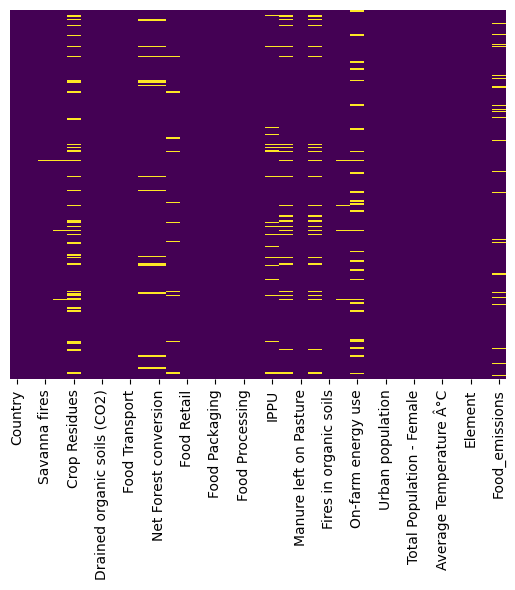

In [56]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [57]:
df2

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Emissions_food,Average Temperature Â°C,Item,Element,Unit,Food_emissions,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Land Use (ha),area_harvested__ha__per_capita,Land Use per capita (mÂ²),Imports (t),imports__tonnes__per_capita,Imports per capita (kg),Exports (t),exports__tonnes__per_capita,Exports per capita (kg),Domestic supply (t),domestic_supply__tonnes__per_capita,Domestic supply per capita (kg),Food (t),food__tonnes__per_capita,Food per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
0,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.61085,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,NaN,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.52925,All sectors without LULUCF,Emissions (CO2eq) (AR5),kilotonnes,30446.2480,28189672.0,969763.10,0.034401,34.401360,10.670199,90885.0,0.003224,32.240532,10000.0,0.000355,0.354740,149000.0,0.005286,5.285624,1438000.0,0.051012,51.011592,1271000.0,0.045087,45.087434,167000.0,0.005924,5.924156,45.078865,123.503738,28.989624,1.190645,0.196715
1,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.61085,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,NaN,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.52925,All sectors without LULUCF,Emissions (CO2eq) from N2O (AR5),kilotonnes,4137.5809,28189672.0,969763.10,0.034401,34.401360,10.670199,90885.0,0.003224,32.240532,10000.0,0.000355,0.354740,149000.0,0.005286,5.285624,1438000.0,0.051012,51.011592,1271000.0,0.045087,45.087434,167000.0,0.005924,5.924156,45.078865,123.503738,28.989624,1.190645,0.196715
2,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.61085,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,NaN,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.52925,All sectors without LULUCF,Emissions (CO2),kilotonnes,8630.0000,28189672.0,969763.10,0.034401,34.401360,10.670199,90885.0,0.003224,32.240532,10000.0,0.000355,0.354740,149000.0,0.005286,5.285624,1438000.0,0.051012,51.011592,1271000.0,0.045087,45.087434,167000.0,0.005924,5.924156,45.078865,123.503738,28.989624,1.190645,0.196715
3,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.61085,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,NaN,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.52925,Agricultural Soils,Emissions (CO2eq) (AR5),kilotonnes,NaN,28189672.0,969763.10,0.034401,34.401360,10.670199,90885.0,0.003224,32.240532,10000.0,0.000355,0.354740,149000.0,0.005286,5.285624,1438000.0,0.051012,51.011592,1271000.0,0.045087,45.087434,167000.0,0.005924,5.924156,45.078865,123.503738,28.989624,1.190645,0.196715
4,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.61085,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,NaN,21966187.0,6836980.0,1424

In [58]:
dfinal

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Emissions_food,Average Temperature Â°C,Item,Element,Unit,Food_emissions,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Land Use (ha),area_harvested__ha__per_capita,Land Use per capita (mÂ²),Imports (t),imports__tonnes__per_capita,Imports per capita (kg),Exports (t),exports__tonnes__per_capita,Exports per capita (kg),Domestic supply (t),domestic_supply__tonnes__per_capita,Domestic supply per capita (kg),Food (t),food__tonnes__per_capita,Food per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day),commodity,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference
0,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.61085,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,NaN,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.52925,All sectors without LULUCF,Emissions (CO2eq) (AR5),kilotonnes,30446.2480,28189672.0,969763.10,0.034401,34.401360,10.670199,90885.0,0.003224,32.240532,10000.0,0.000355,0.354740,149000.0,0.005286,5.285624,1438000.0,0.051012,51.011592,1271000.0,0.045087,45.087434,167000.0,0.005924,5.924156,45.078865,123.503738,28.989624,1.190645,0.196715,Wheat,14.96,14.96%,678000,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources
1,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.61085,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,NaN,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.52925,All sectors without LULUCF,Emissions (CO2eq) from N2O (AR5),kilotonnes,4137.5809,28189672.0,969763.10,0.034401,34.401360,10.670199,90885.0,0.003224,32.240532,10000.0,0.000355,0.354740,149000.0,0.005286,5.285624,1438000.0,0.051012,51.011592,1271000.0,0.045087,45.087434,167000.0,0.005924,5.924156,45.078865,123.503738,28.989624,1.190645,0.196715,Wheat,14.96,14.96%,678000,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources
2,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.61085,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,NaN,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.52925,All sectors without LULUCF,Emissions (CO2),kilotonnes,8630.0000,28189672.0,969763.10,0.034401,34.401360,10.670199,90885.0,0.003224,32.240532,10000.0,0.000355,0.354740,149000.0,0.005286,5.285624,1438000.0,0.051012,51.011592,1271000.0,0.045087,45.087434,167000.0,0.005924,5.924156,45.078865,123.503738,28.989624,1.190645,0.196715,Wheat,14.96,14.96%,678000,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources
3,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.61085,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,NaN,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.52925,Agricultural Soils,Emiss

In [59]:
dfinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820437 entries, 0 to 2820436
Data columns (total 74 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   Country                                     object 
 1   Year                                        int64  
 2   Savanna fires                               float64
 3   Forest fires                                float64
 4   Crop Residues                               float64
 5   Rice Cultivation                            float64
 6   Drained organic soils (CO2)                 float64
 7   Pesticides Manufacturing                    float64
 8   Food Transport                              float64
 9   Forestland                                  float64
 10  Net Forest conversion                       float64
 11  Food Household Consumption                  float64
 12  Food Retail                                 float64
 13  On-farm Electricity Use    

In [60]:
dfinal.nunique()

Country                   109
Year                       11
Savanna fires             651
Forest fires              475
Crop Residues             707
                         ... 
treatment                 146
cause_of_loss             253
sample_size               124
method_data_collection      9
reference                 148
Length: 74, dtype: int64

In [61]:
subset_data = dfinal[dfinal['Year'] == 2010]
subset_data

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Emissions_food,Average Temperature Â°C,Item,Element,Unit,Food_emissions,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Land Use (ha),area_harvested__ha__per_capita,Land Use per capita (mÂ²),Imports (t),imports__tonnes__per_capita,Imports per capita (kg),Exports (t),exports__tonnes__per_capita,Exports per capita (kg),Domestic supply (t),domestic_supply__tonnes__per_capita,Domestic supply per capita (kg),Food (t),food__tonnes__per_capita,Food per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day),commodity,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference
0,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.61085,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,NaN,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.529250,All sectors without LULUCF,Emissions (CO2eq) (AR5),kilotonnes,30446.2480,28189672.0,969763.10,0.034401,34.401360,10.670199,90885.0,0.003224,32.240532,10000.0,0.000355,0.354740,149000.0,0.005286,5.285624,1438000.0,0.051012,51.011592,1271000.0,0.045087,45.087434,167000.0,0.005924,5.924156,45.078865,123.503738,28.989624,1.190645,0.196715,Wheat,14.96,14.96%,678000,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources
1,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.61085,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,NaN,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.529250,All sectors without LULUCF,Emissions (CO2eq) from N2O (AR5),kilotonnes,4137.5809,28189672.0,969763.10,0.034401,34.401360,10.670199,90885.0,0.003224,32.240532,10000.0,0.000355,0.354740,149000.0,0.005286,5.285624,1438000.0,0.051012,51.011592,1271000.0,0.045087,45.087434,167000.0,0.005924,5.924156,45.078865,123.503738,28.989624,1.190645,0.196715,Wheat,14.96,14.96%,678000,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources
2,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.61085,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,NaN,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.529250,All sectors without LULUCF,Emissions (CO2),kilotonnes,8630.0000,28189672.0,969763.10,0.034401,34.401360,10.670199,90885.0,0.003224,32.240532,10000.0,0.000355,0.354740,149000.0,0.005286,5.285624,1438000.0,0.051012,51.011592,1271000.0,0.045087,45.087434,167000.0,0.005924,5.924156,45.078865,123.503738,28.989624,1.190645,0.196715,Wheat,14.96,14.96%,678000,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources
3,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.61085,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,NaN,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.529250,Agricultural Soils,E

In [ ]:
sns.heatmap(subset_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: >

In [ ]:
dfinal.columns

In [ ]:
dfinal.info()